In [1]:
import sys
import struct
import ctypes
import numpy as np

from matplotlib import pyplot as plt
import mpl_toolkits.mplot3d.axes3d as p3
from matplotlib import animation
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
import ctypes
import time

%matplotlib notebook

class pointStruct(ctypes.Structure):
    _fields_ = [('lineCount', ctypes.c_int),
                ('allDataPointsCount', ctypes.c_int),
                ('pointCounts', ctypes.POINTER(ctypes.c_int)),
                ('xValues', ctypes.POINTER(ctypes.c_double)),
                ('yValues', ctypes.POINTER(ctypes.c_double)),
                ('zValues', ctypes.POINTER(ctypes.c_double))]
  
mydll = ctypes.cdll.LoadLibrary(r"D:\0nastia\GitHub\RelativicHeavyBall\x64\Debug\testLogisticRegressionLibrary.dll")

testFunc = mydll.logisticRegressionMulty
mydll.logisticRegressionMulty.restype = ctypes.POINTER(pointStruct)
mydll.logisticRegressionMulty.argtypes = [ctypes.c_double, ctypes.c_double, ctypes.c_double, ctypes.c_double, ctypes.c_int, 
                                          ctypes.c_double, ctypes.c_double, ctypes.c_double, ctypes.c_double, ctypes.c_int, 
                                          ctypes.c_double, 
                                          ctypes.c_double, ctypes.c_double, ctypes.c_double, ctypes.c_double, 
                                          ctypes.c_int, ctypes.c_double, ctypes.c_double, ctypes.c_double, 
                                          ctypes.c_bool,
                                          ctypes.c_bool,
                                          ctypes.c_double] 

print(time.strftime('%X %x %Z'))

_negativeX0 = 3.0
_negativeY0 = 3.0
_negativeSigmaX = 1.0
_negativeSigmaY = 1.0
_negativeCount = 100

_positiveX0 = 6.0
_positiveY0 = 5.0
_positiveSigmaX = 1.0
_positiveSigmaY = 1.0
_positiveCount = 100

_regularization = 0.01

_xStart = 0
_yStart = 0
_xSpeedStart = 0
_ySpeedStart = 0

_stepLimit = 2000
_targetAccuracy = 0.0001
_param = 1.0
_lightSpeed = 8.0
_useGradientHessian = True
_useHavyBallHessian = False
_h = 0.01

ret = testFunc(_negativeX0, _negativeY0, _negativeSigmaX, _negativeSigmaY, _negativeCount, 
               _positiveX0, _positiveY0, _positiveSigmaX, _positiveSigmaY, _positiveCount, 
               _regularization, 
               _xStart, _yStart, _xSpeedStart, _ySpeedStart, 
               _stepLimit, _targetAccuracy, _param, _lightSpeed, 
               _useGradientHessian, _useHavyBallHessian,
               _h)

print(time.strftime('%X %x %Z'))

array_pointer = ctypes.cast(ret.contents.pointCounts, ctypes.POINTER(ctypes.c_int * ret.contents.lineCount))
pointCounts = np.frombuffer(array_pointer.contents, dtype = ctypes.c_int)

array_pointer = ctypes.cast(ret.contents.xValues, ctypes.POINTER(ctypes.c_double * ret.contents.allDataPointsCount))
xValues = np.frombuffer(array_pointer.contents, dtype = ctypes.c_double)

array_pointer = ctypes.cast(ret.contents.yValues, ctypes.POINTER(ctypes.c_double * ret.contents.allDataPointsCount))
yValues = np.frombuffer(array_pointer.contents, dtype = ctypes.c_double)

array_pointer = ctypes.cast(ret.contents.zValues, ctypes.POINTER(ctypes.c_double * ret.contents.allDataPointsCount))
zValues = np.frombuffer(array_pointer.contents, dtype = ctypes.c_double)

print(ret.contents.lineCount)
print(ret.contents.allDataPointsCount)
print(pointCounts)
print(xValues)
print(yValues)
print(zValues)

class logisticRegressionData(ctypes.Structure):
    _fields_ = [('negativePointCount', ctypes.c_int),
                ('negativePointXValues', ctypes.POINTER(ctypes.c_double)),
                ('negativePointYValues', ctypes.POINTER(ctypes.c_double)),
                
                ('positivePointCount', ctypes.c_int),
                ('positivePointXValues', ctypes.POINTER(ctypes.c_double)),
                ('positivePointYValues', ctypes.POINTER(ctypes.c_double)),
                
                ('lineCount', ctypes.c_int),
                ('lineAParameters', ctypes.POINTER(ctypes.c_double)),
                ('lineBParameters', ctypes.POINTER(ctypes.c_double)),
                ('lineCParameters', ctypes.POINTER(ctypes.c_double))]
    
getLogisticRegressionData = mydll.getLogisticRegressionData
mydll.getLogisticRegressionData.restype = ctypes.POINTER(logisticRegressionData)
mydll.getLogisticRegressionData.argtypes = []

data = getLogisticRegressionData()

array_pointer = ctypes.cast(data.contents.negativePointXValues, ctypes.POINTER(ctypes.c_double * data.contents.negativePointCount))
negativePointXValues = np.frombuffer(array_pointer.contents, dtype = ctypes.c_double)
array_pointer = ctypes.cast(data.contents.negativePointYValues, ctypes.POINTER(ctypes.c_double * data.contents.negativePointCount))
negativePointYValues = np.frombuffer(array_pointer.contents, dtype = ctypes.c_double)

array_pointer = ctypes.cast(data.contents.positivePointXValues, ctypes.POINTER(ctypes.c_double * data.contents.positivePointCount))
positivePointXValues = np.frombuffer(array_pointer.contents, dtype = ctypes.c_double)
array_pointer = ctypes.cast(data.contents.positivePointYValues, ctypes.POINTER(ctypes.c_double * data.contents.positivePointCount))
positivePointYValues = np.frombuffer(array_pointer.contents, dtype = ctypes.c_double)

array_pointer = ctypes.cast(data.contents.lineAParameters, ctypes.POINTER(ctypes.c_double * data.contents.lineCount))
lineAParameters = np.frombuffer(array_pointer.contents, dtype = ctypes.c_double)
array_pointer = ctypes.cast(data.contents.lineBParameters, ctypes.POINTER(ctypes.c_double * data.contents.lineCount))
lineBParameters = np.frombuffer(array_pointer.contents, dtype = ctypes.c_double)
array_pointer = ctypes.cast(data.contents.lineCParameters, ctypes.POINTER(ctypes.c_double * data.contents.lineCount))
lineCParameters = np.frombuffer(array_pointer.contents, dtype = ctypes.c_double)

#print(negativePointXValues)
#print(negativePointYValues)
#print(positivePointXValues)
#print(positivePointYValues)
#print(lineAParameters)
#print(lineBParameters)
#print(lineCParameters)

23:23:53 06/14/20 FLE Daylight Time
23:28:08 06/14/20 FLE Daylight Time
4
8012
[2003 2003 2003 2003]
[0.00000000e+00 6.83238315e-07 2.73885048e-06 ... 1.71345971e+01
 1.71342987e+01 1.71340008e+01]
[0.00000000e+00 7.85073140e-04 1.56759914e-03 ... 2.51666657e+00
 2.51662689e+00 2.51658723e+00]
[138.62943611 138.47179484 138.31640178 ...  23.13486255  23.1348548
  23.13484708]


<IPython.core.display.Javascript object>


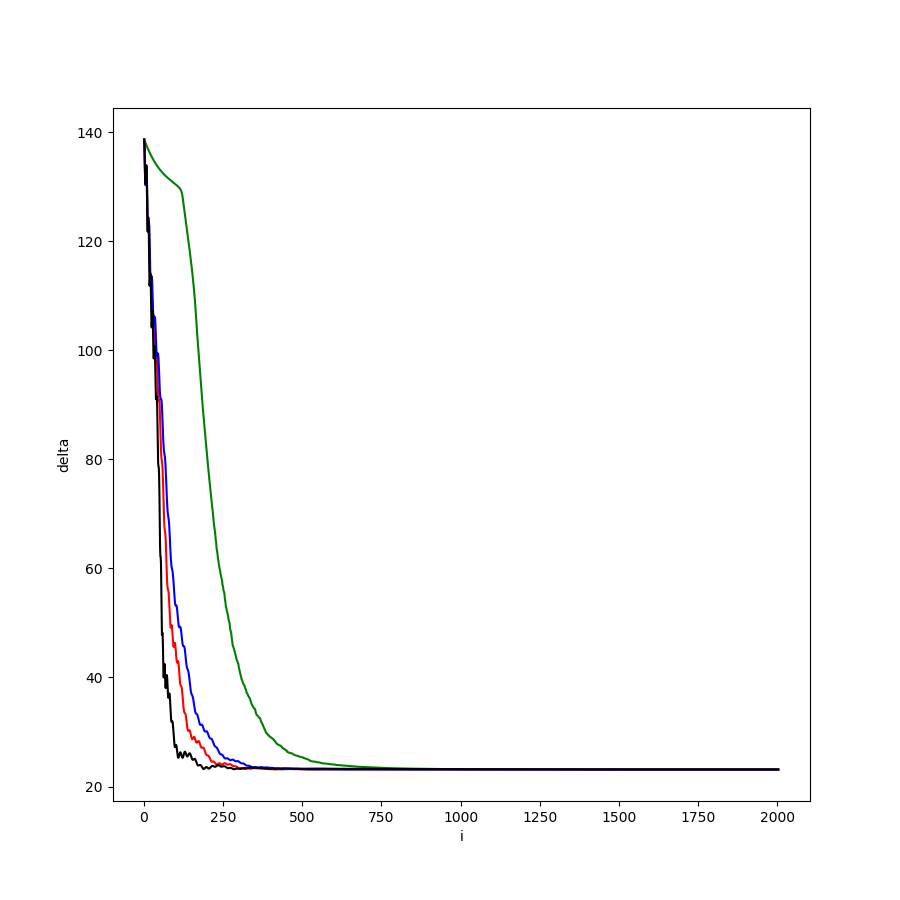

In [6]:
colors = ['g', 'r', 'b', 'k']

fig = plt.figure(figsize = (9, 9)) 

count = pointCounts[0]
iterations = [i+1 for i in range(count)]

a = 0

for x in range(4):     
    sh = 0
    sz = count - sh
    #if x != 0:
    plt.plot(iterations[sh:sh + sz], zValues[a + sh:a+sh + sz], color = colors[x])
    a += pointCounts[x]

plt.ylabel('delta')
plt.xlabel('i')
plt.show()

<IPython.core.display.Javascript object>


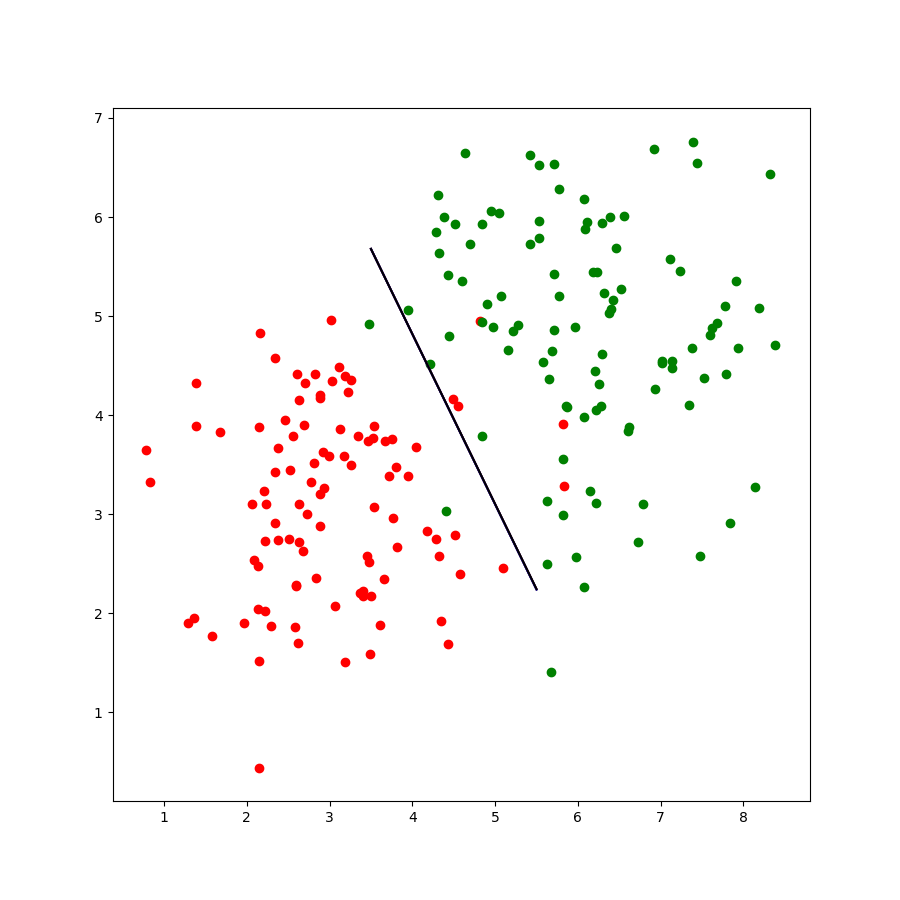

[5.678358237072143, 5.608185764192137, 5.538013291312131, 5.467840818432125, 5.397668345552119, 5.327495872672114, 5.257323399792107, 5.187150926912102, 5.116978454032095, 5.046805981152089, 4.976633508272083, 4.906461035392078, 4.836288562512071, 4.766116089632065, 4.69594361675206, 4.625771143872052, 4.5555986709920475, 4.485426198112041, 4.415253725232035, 4.3450812523520295, 4.274908779472024, 4.204736306592017, 4.134563833712011, 4.064391360832006, 3.9942188879519986, 3.9240464150719934, 3.853873942191987, 3.783701469311981, 3.7135289964319758, 3.6433565235519696, 3.5731840506719648, 3.5030115777919573, 3.432839104911952, 3.3626666320319445, 3.2924941591519397, 3.222321686271933, 3.152149213391928, 3.081976740511922, 3.0118042676319154, 2.9416317947519106, 2.871459321871903, 2.801286848991898, 2.7311143761118917, 2.6609419032318855, 2.5907694303518793, 2.520596957471874, 2.450424484591868, 2.3802520117118617, 2.3100795388318542, 2.239907065951849]


In [3]:
fig = plt.figure(figsize = (9, 9)) 

n=50

x = np.linspace(3.5, 5.5, n)

def f1(i):
    return (-lineAParameters[0]*x[i]+lineCParameters[0])/lineBParameters[0]
def f2(i):
    return (-lineAParameters[1]*x[i]+lineCParameters[1])/lineBParameters[1]
def f3(i):
    return (-lineAParameters[2]*x[i]+lineCParameters[2])/lineBParameters[2]
def f4(i):
    return (-lineAParameters[3]*x[i]+lineCParameters[3])/lineBParameters[3]


y1 = [f1(i) for i in range(n)]
y2 = [f2(i) for i in range(n)]
y3 = [f3(i) for i in range(n)]
y4 = [f4(i) for i in range(n)]

print(y1)

plt.plot(x, y1, color='g')
plt.plot(x, y2, color='r')
plt.plot(x, y3, color='b')
plt.plot(x, y4, color='k')

for j in range(data.contents.negativePointCount):
    plt.scatter(negativePointXValues[j], negativePointYValues[j], color = 'r')
    
for j in range(data.contents.positivePointCount):
    plt.scatter(positivePointXValues[j], positivePointYValues[j], color = 'g')